In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SARSA Plots

In [82]:
df1 = pd.read_csv("sarsa_results/1/rewards.log", header=0, names=["episode_idx", "length", "reward"], usecols=[1, 2])
df1.head()

,length,reward
0,1165,-330.267391
1,960,-288.688246
2,960,-256.965846
3,755,-192.479920
4,1165,-225.124584


In [81]:
df1.shape

(154884, 3)

In [83]:
df2 = pd.read_csv("sarsa_results/2/rewards.log", header=0, names=["episode_idx", "length", "reward"], usecols=[1, 2])
df2.head()

,length,reward
0,1165,-194.248942
1,960,-261.360363
2,755,-177.633105
3,1480,-426.966235
4,1370,-369.419028


In [111]:
avg_over = 1000
tail = df1.shape[0] % avg_over
df1.drop(df1.tail(tail).index, inplace = True)

avg_rewards = np.average(np.array(df1["reward"]).reshape(-1, avg_over), axis= 1)
avg_len = np.average(np.array(df1["length"]).reshape(-1, avg_over), axis= 1)
avg_df1 = pd.DataFrame({"idx":np.arange(1, len(avg_len)+1) ,"avg_length":avg_len ,"avg_reward":avg_rewards})
avg_df1.head()

,idx,avg_length,avg_reward
0,1,4702.491,-351.525135
1,2,6951.058,-328.597250
2,3,7341.505,-328.007161
3,4,8083.679,-336.522595
4,5,8530.740,-321.712590


In [112]:
avg_df1.shape

(154, 3)

In [100]:
avg_df1 = avg_df1.loc[:30, :]

In [101]:
tail = df2.shape[0] % avg_over
df2.drop(df2.tail(tail).index, inplace = True)

avg_rewards = np.average(np.array(df2["reward"]).reshape(-1, avg_over), axis= 1)
avg_len = np.average(np.array(df2["length"]).reshape(-1, avg_over), axis= 1)
avg_df2 = pd.DataFrame({"idx":np.arange(1, len(avg_len)+1) ,"avg_length":avg_len ,"avg_reward":avg_rewards})
avg_df2.head()

,idx,avg_length,avg_reward
0,1,2492.435,-380.999527
1,2,28241.142,-789.330050
2,3,41515.029,-956.108578
3,4,39259.756,-867.544531
4,5,32078.631,-698.083393


In [102]:
avg_df2.shape

(21, 3)

In [103]:
avg_df1['SARSA params'] = ["16000 states,epsilon=0.1"]*avg_df1.shape[0]
avg_df2['SARSA params'] = ["43200 states,epsilon=decaying"]*avg_df2.shape[0]
avg_df = pd.concat([avg_df1, avg_df2], axis=0)
avg_df.head()

,idx,avg_length,avg_reward,SARSA params
0,1,4702.491,-351.525135,"16000 states,epsilon=0.1"
1,2,6951.058,-328.597250,"16000 states,epsilon=0.1"
2,3,7341.505,-328.007161,"16000 states,epsilon=0.1"
3,4,8083.679,-336.522595,"16000 states,epsilon=0.1"
4,5,8530.740,-321.712590,"16000 states,epsilon=0.1"


In [104]:
avg_df.shape

(52, 4)

Text(0.5, 0, 'Epsiode X 1000')

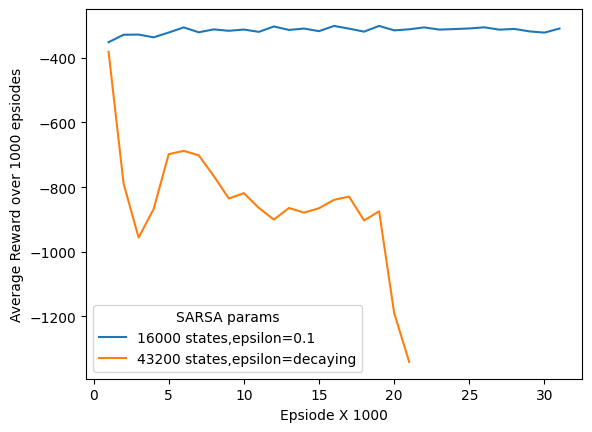

In [105]:
sns.lineplot(avg_df, x= "idx", y= "avg_reward", hue="SARSA params")
plt.ylabel("Average Reward over 1000 epsiodes")
plt.xlabel("Epsiode X 1000")

<AxesSubplot: xlabel='idx', ylabel='avg_length'>

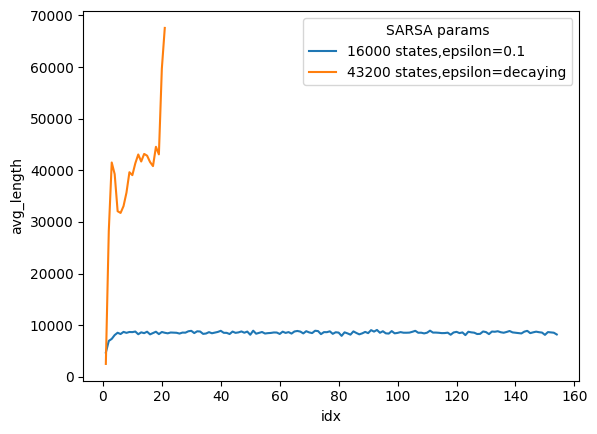

In [93]:
sns.lineplot(avg_df, x= "idx", y= "avg_length", hue="SARSA params")


In [107]:
avg_df['reward_per_timestep'] = avg_df['avg_reward']/avg_df["avg_length"]
avg_df.head()

,idx,avg_length,avg_reward,SARSA params,reward_per_timestep
0,1,4702.491,-351.525135,"16000 states,epsilon=0.1",-0.074753
1,2,6951.058,-328.597250,"16000 states,epsilon=0.1",-0.047273
2,3,7341.505,-328.007161,"16000 states,epsilon=0.1",-0.044678
3,4,8083.679,-336.522595,"16000 states,epsilon=0.1",-0.041630
4,5,8530.740,-321.712590,"16000 states,epsilon=0.1",-0.037712


Text(0.5, 1.0, 'average reward per timestep vs episodes trained')

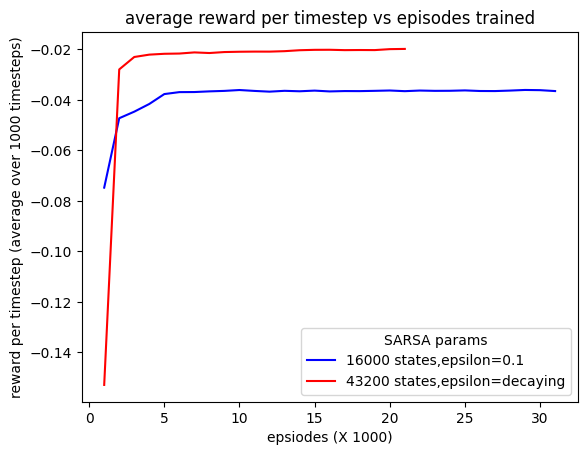

In [121]:
sns.lineplot(avg_df, x= "idx", y= "reward_per_timestep", hue="SARSA params", palette=['b', 'r'])
plt.ylabel("reward per timestep (average over 1000 timesteps)")
plt.xlabel("epsiodes (X 1000)")
plt.title("average reward per timestep vs episodes trained")

Text(0.5, 1.0, 'average reward vs episodes trained (configuration 1)')

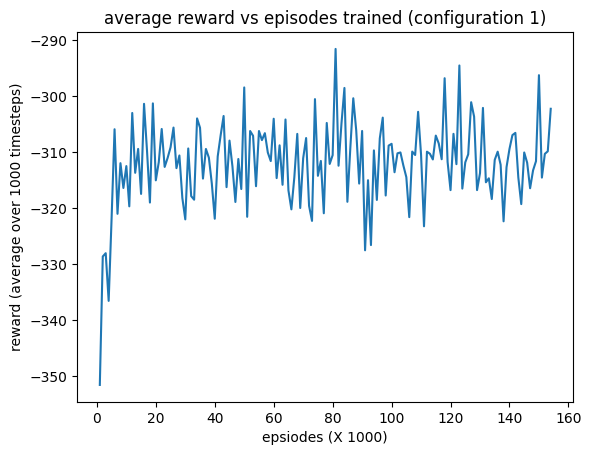

In [114]:
sns.lineplot(avg_df1, x= "idx", y= "avg_reward")
plt.ylabel("reward (average over 1000 timesteps)")
plt.xlabel("epsiodes (X 1000)")
plt.title("average reward vs episodes trained (configuration 1)")


Text(0.5, 1.0, 'average reward vs episodes trained (configuration 2)')

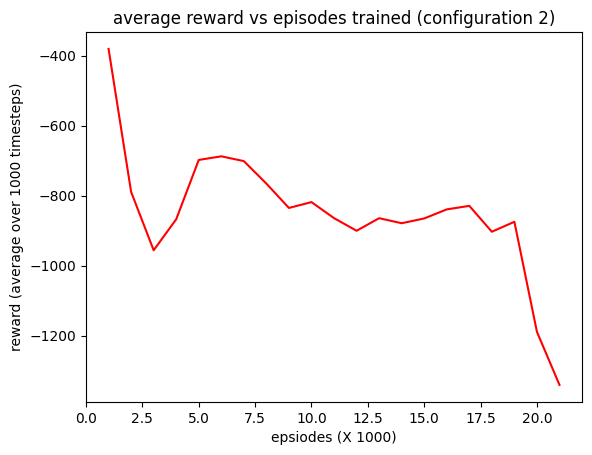

In [118]:
sns.lineplot(avg_df2, x= "idx", y= "avg_reward", color='red')
plt.ylabel("reward (average over 1000 timesteps)")
plt.xlabel("epsiodes (X 1000)")
plt.title("average reward vs episodes trained (configuration 2)")

Text(0.5, 1.0, 'average episode length vs episodes trained (configuration 1)')

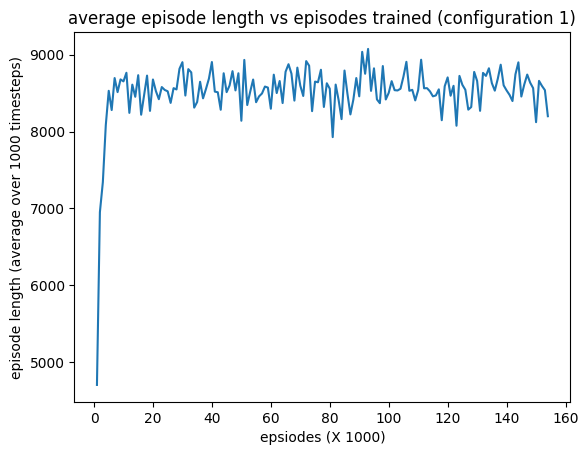

In [116]:
sns.lineplot(avg_df1, x= "idx", y= "avg_length")
plt.ylabel("episode length (average over 1000 timesteps)")
plt.xlabel("epsiodes (X 1000)")
plt.title("average episode length vs episodes trained (configuration 1)")

Text(0.5, 1.0, 'average episode length vs episodes trained (configuration 2)')

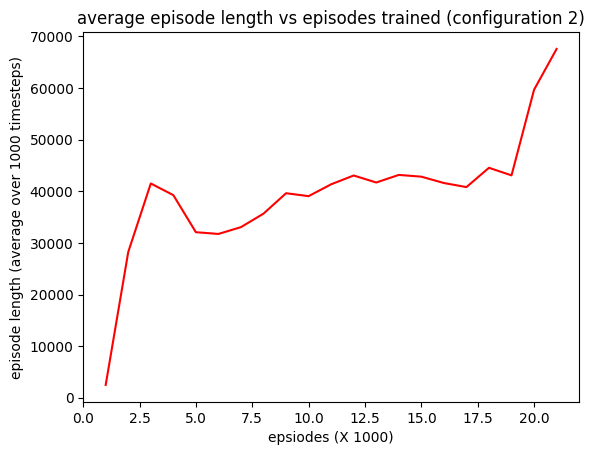

In [119]:
sns.lineplot(avg_df2, x= "idx", y= "avg_length", color='red')
plt.ylabel("episode length (average over 1000 timesteps)")
plt.xlabel("epsiodes (X 1000)")
plt.title("average episode length vs episodes trained (configuration 2)")